In [13]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit import *
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize
sim = Aer.get_backend('aer_simulator')

<IPython.core.display.Latex object>

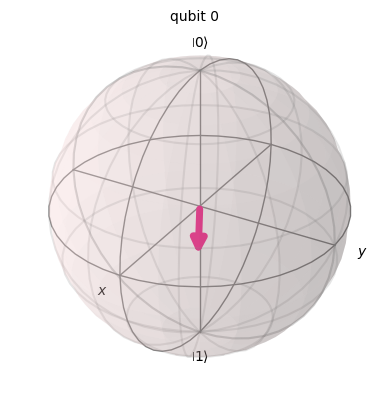

In [14]:
#creating random state vector.
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle = "))
plot_bloch_multivector(psi)

In [15]:
init_gate = Initialize(psi)
init_gate.label = 'init'
def create_entanglement(qc,a,b):
    qc.h(a)
    qc.cx(0,1)
def alice_gate(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
def ms(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)


In [16]:
def bob_gate(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

In [17]:
qr = QuantumRegister(2, name='q')
crz = ClassicalRegister(1, name='crz')
crx = classicalregister(1, name='crx')
qc = QuantumCircuit(qr,crz,crx)
qc.append(init_gate, [0])
qc.barrier()

create_entanglement(qc,1,2)
qc.barrier()
alice_gate(qc, 0, 1)
ms(qc,0,1)
bob_gate(qc, 2, crz, crx)
qc.draw()

TypeError: 'module' object is not callable